# EEG DataLoader

The dimensions of the training set are as follows: 4,500 samples, 64 channels, and a time length of 795. This corresponds to 5 categories in y_train.

The dimensions of the testing set are as follows: 750 samples, 64 channels, and a time length of 795. This corresponds to 5 categories in y_test.

You can download it from this Google Drive link: [https://drive.google.com/drive/folders/1ykR-mn4d4KfFeeNrfR6UdtebsNRY8PU2?usp=sharing].
Please download the data and place it in your data_path at "./data."

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torchviz import make_dot

In [6]:
data_path = '/Users/siddhartharaovs/Downloads/CS555-Agile project Files/BCI_project/'

In [2]:
# Parameters cell for Papermill
input_file_path = 'hello_data.xlsx'  # This will be overwritten by Papermill


In [7]:
train_data = np.load(data_path + 'train_data.npy')
test_data = np.load(data_path + 'test_data.npy')
train_label = np.load(data_path + 'train_label.npy')
test_label = np.load(data_path + 'test_label.npy')

#To convert the data into PyTorch tensors
x_train_tensor = torch.Tensor(train_data)
y_train_tensor = torch.LongTensor(train_label)
x_test_tensor = torch.Tensor(test_data)
y_test_tensor = torch.LongTensor(test_label)

In [8]:
y_test_tensor

tensor([3, 4, 1, 2, 1, 4, 3, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 4, 4, 1, 0, 1, 0, 2,
        3, 0, 3, 3, 3, 3, 0, 3, 4, 2, 4, 0, 1, 4, 4, 0, 4, 1, 0, 2, 4, 3, 0, 0,
        2, 3, 1, 0, 2, 1, 1, 1, 4, 3, 2, 2, 3, 3, 4, 1, 4, 4, 0, 4, 4, 3, 0, 4,
        3, 0, 0, 2, 2, 0, 4, 2, 4, 0, 4, 1, 2, 0, 1, 1, 0, 2, 2, 3, 0, 3, 2, 1,
        3, 3, 1, 3, 2, 3, 4, 0, 4, 3, 3, 0, 2, 2, 0, 0, 3, 3, 0, 0, 1, 3, 1, 2,
        2, 4, 2, 3, 1, 3, 0, 0, 3, 4, 4, 2, 2, 3, 4, 1, 1, 0, 4, 1, 2, 1, 4, 4,
        1, 1, 1, 2, 0, 4, 4, 2, 0, 4, 1, 0, 2, 1, 2, 2, 1, 4, 3, 1, 0, 1, 2, 0,
        2, 4, 3, 2, 4, 0, 4, 3, 4, 3, 1, 0, 1, 4, 0, 0, 2, 1, 0, 3, 2, 3, 3, 3,
        1, 3, 4, 0, 1, 4, 3, 2, 4, 0, 4, 4, 2, 4, 4, 0, 3, 1, 3, 2, 4, 3, 0, 3,
        1, 1, 3, 1, 4, 4, 1, 2, 4, 0, 3, 3, 2, 0, 1, 3, 1, 1, 2, 0, 0, 4, 3, 2,
        2, 2, 2, 0, 0, 1, 2, 1, 0, 3, 4, 4, 0, 1, 0, 0, 3, 1, 2, 3, 0, 3, 2, 1,
        2, 2, 4, 2, 1, 1, 0, 1, 3, 0, 1, 4, 2, 1, 1, 3, 3, 0, 0, 2, 3, 0, 1, 4,
        2, 3, 4, 3, 4, 4, 3, 0, 4, 4, 2,

In [9]:
import pandas as pd 
ttt=x_test_tensor

In [10]:

print((ttt))

tensor([[[-1.4539e-01, -1.1887e+00, -6.2574e-01,  ...,  2.4655e+00,
           2.6696e+00,  2.3724e+00],
         [-5.7686e-01, -1.5561e+00, -8.6266e-01,  ...,  2.5168e+00,
           2.6845e+00,  2.3963e+00],
         [ 8.7765e-01,  4.4239e-01,  7.5384e-01,  ...,  1.2806e+00,
           1.3053e+00,  1.2874e+00],
         ...,
         [ 1.4887e+00,  1.5624e+00,  1.5606e+00,  ...,  5.0392e-01,
           3.4577e-01,  5.0473e-01],
         [ 8.3546e-01,  1.0588e+00,  9.6782e-01,  ...,  4.9208e-03,
          -1.8973e-01, -1.3017e-01],
         [-7.2472e-01, -4.3532e-01, -5.2322e-01,  ..., -9.4211e-01,
          -9.8397e-01, -1.0612e+00]],

        [[ 1.1291e+00,  3.0676e-01,  1.0398e+00,  ...,  3.3098e+00,
           3.3740e+00,  3.3533e+00],
         [-1.7375e+00, -2.6414e+00, -1.7875e+00,  ...,  2.4635e+00,
           2.7399e+00,  2.2279e+00],
         [ 2.7248e+00,  2.3843e+00,  2.7101e+00,  ...,  2.0020e+00,
           1.8699e+00,  2.2299e+00],
         ...,
         [ 5.0303e-01,  5

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Setting GPU on your computer

In [12]:
train_dataset = TensorDataset(x_train_tensor.to(device), y_train_tensor.to(device)) # input data to Tensor dataloader
train_loader = DataLoader(train_dataset, batch_size=64, drop_last=True, shuffle=True) #  Batch size refers to the number of data sample
test_dataset = TensorDataset(x_test_tensor.to(device), y_test_tensor.to(device))
test_loader = DataLoader(test_dataset, batch_size=64,  drop_last=True,shuffle=False)

In [13]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [14]:
count = 0
for batch_idx, (data, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print("Data:")
    print(data[:1])  # Print first 5 data entries in the batch
    d1=data[:1]
    print("Labels:")
    print(labels[:1])  # Print first 5 label entries in the batch
    l1=labels[:1]
    count += 1
    if count == 1:
        break  # Stop after printing 5 batches

Batch 1:
Data:
tensor([[[-0.6027, -0.6685, -0.6002,  ..., -0.3921, -0.3048, -0.3725],
         [-1.0314, -1.1167, -1.0874,  ..., -0.8738, -0.8232, -0.8373],
         [-1.6107, -1.5554, -1.5619,  ..., -1.9509, -1.9293, -1.8288],
         ...,
         [ 0.5318,  0.4921,  0.5263,  ...,  0.6830,  0.7180,  0.6891],
         [ 0.7194,  0.7650,  0.7355,  ...,  0.5477,  0.5164,  0.5619],
         [ 0.4099,  0.3909,  0.3721,  ...,  0.2103,  0.1947,  0.2959]]])
Labels:
tensor([2])


In [15]:
print(type(d1))
print(type(l1))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [16]:
print(d1)
print(l1)

tensor([[[-0.6027, -0.6685, -0.6002,  ..., -0.3921, -0.3048, -0.3725],
         [-1.0314, -1.1167, -1.0874,  ..., -0.8738, -0.8232, -0.8373],
         [-1.6107, -1.5554, -1.5619,  ..., -1.9509, -1.9293, -1.8288],
         ...,
         [ 0.5318,  0.4921,  0.5263,  ...,  0.6830,  0.7180,  0.6891],
         [ 0.7194,  0.7650,  0.7355,  ...,  0.5477,  0.5164,  0.5619],
         [ 0.4099,  0.3909,  0.3721,  ...,  0.2103,  0.1947,  0.2959]]])
tensor([2])


In [17]:
import pandas as pd

# Assuming you have two tensors: tensor1 and tensor2

# Convert tensors to numpy arrays
array1 = d1.numpy()
array2 = l1.numpy()
print(array1)
# Create a DataFrame from the numpy arrays
df = pd.DataFrame({'Column1': array1.flatten(), 'Column2': array2.flatten()})

# Display the first 5 entries of the DataFrame
print(df.head())


[[[-0.60271907 -0.6684518  -0.60020256 ... -0.39212757 -0.3047747
   -0.37248862]
  [-1.0313685  -1.1167293  -1.0874422  ... -0.873763   -0.82321614
   -0.8372911 ]
  [-1.6107099  -1.5553995  -1.5618705  ... -1.9508519  -1.9293128
   -1.8287702 ]
  ...
  [ 0.5318006   0.49213016  0.5263185  ...  0.68299156  0.7179921
    0.6891086 ]
  [ 0.719361    0.76499116  0.73552984 ...  0.54771256  0.5163996
    0.56186694]
  [ 0.4099011   0.39092633  0.3721291  ...  0.2102938   0.19472449
    0.2959128 ]]]


ValueError: All arrays must be of the same length

In [18]:
import pandas as pd

# Initialize empty lists to store the data
data_list = []

# Iterate over the DataLoader
for batch in train_loader:
    # Extract data and labels from the batch
    x_batch, y_batch = batch
    
    # Convert tensors to numpy arrays
    array1 = x_batch
    array2 = y_batch
    
    # Flatten arrays if needed
    array1_flat = array1.flatten()
    array2_flat = array2.flatten()
    
    # Combine arrays into a list of tuples
    combined_data = list(zip(array1_flat, array2_flat))
    
    # Extend the data list with the combined data from the batch
    data_list.extend(combined_data)

# Create a DataFrame from the combined data
df = pd.DataFrame(data_list, columns=['Column1', 'Column2'])

# Display the first 5 entries of the DataFrame
print(df.head())


          Column1    Column2
0  tensor(3.0447)  tensor(1)
1  tensor(3.0160)  tensor(2)
2  tensor(3.0559)  tensor(2)
3  tensor(3.0685)  tensor(2)
4  tensor(3.0350)  tensor(0)


In [19]:
import pandas as pd

# Assuming df is your DataFrame containing the combined data

# Define the file path where you want to save the Excel file
excel_file_path = 'combined_data.xlsx'

# Store the DataFrame in an Excel file
df.to_excel(excel_file_path, index=False)

print(f"DataFrame successfully saved to {excel_file_path}")


DataFrame successfully saved to combined_data.xlsx


In [20]:
df = pd.read_excel('combined_data.xlsx')

# Extract integer values from tensor strings in Column2
df['Column2'] = df['Column2'].str.extract(r'tensor\((\d+)\)').astype(int)

# Define the mapping from label numbers to class descriptions
label_to_class = {
    0: "hello",
    1: "help me",
    2: "stop",
    3: "thank you",
    4: "yes"
}

# Apply the mapping to create a new column 'Class'
df['Class'] = df['Column2'].map(label_to_class)

# Save the DataFrame with the new 'Class' column to a new Excel file
df.to_excel('combined_data_classified.xlsx', index=False)

# Print the first few rows of the DataFrame to demonstrate the classification
print(df.head())


          Column1  Column2    Class
0  tensor(3.0447)        1  help me
1  tensor(3.0160)        2     stop
2  tensor(3.0559)        2     stop
3  tensor(3.0685)        2     stop
4  tensor(3.0350)        0    hello


In [21]:
# Load the classified Excel file
df = pd.read_excel('combined_data_classified.xlsx')

# Labels and their corresponding file names
labels_to_files = {
    "hello": "hello_data.xlsx",
    "help me": "help_me_data.xlsx",
    "stop": "stop_data.xlsx",
    "thank you": "thank_you_data.xlsx",
    "yes": "yes_data.xlsx"
}

# Loop through each label and save the filtered data to separate Excel files
for label, filename in labels_to_files.items():
    # Filter the DataFrame for the current label
    filtered_df = df[df['Class'] == label]
    # Save the filtered DataFrame to an Excel file
    filtered_df.to_excel(filename, index=False)

# Print a message when all files have been successfully saved
print("Files have been successfully saved based on labels.")


Files have been successfully saved based on labels.


In [22]:
import pandas as pd
import numpy as np

# Dictionary to link labels with their corresponding Excel file paths
labels_to_files = {
    "hello": "hello_data.xlsx",
    "help me": "help_me_data.xlsx",
    "stop": "stop_data.xlsx",
    "thank you": "thank_you_data.xlsx",
    "yes": "yes_data.xlsx"
}

# Loop through each label and its corresponding file path
for label, file_path in labels_to_files.items():
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Convert the DataFrame to a NumPy array
    data_array = df.values

    # Save the array as a .npy file
    np.save(f'{label}_data.npy', data_array)

    # Print confirmation message
    print(f"The .npy file for {label} has been successfully created.")


The .npy file for hello has been successfully created.
The .npy file for help me has been successfully created.
The .npy file for stop has been successfully created.
The .npy file for thank you has been successfully created.
The .npy file for yes has been successfully created.


In [23]:
import numpy as np

# List of labels that correspond to the .npy files
labels = ["hello", "help me", "stop", "thank you", "yes"]

# Loop through each label and load the corresponding .npy file
for label in labels:
    # Construct the file path
    file_path = f'{label}_data.npy'
    
    # Load the .npy file
    data = np.load(file_path, allow_pickle=True)
    
    # Print the first five entries of the array
    print(f"First five entries for {label}:")
    print(data[:5])
    print()  # Adds a blank line for better readability between outputs


First five entries for hello:
[['tensor(3.0350)' 0 'hello']
 ['tensor(2.2231)' 0 'hello']
 ['tensor(2.0608)' 0 'hello']
 ['tensor(1.6109)' 0 'hello']
 ['tensor(0.6558)' 0 'hello']]

First five entries for help me:
[['tensor(3.0447)' 1 'help me']
 ['tensor(2.6674)' 1 'help me']
 ['tensor(2.6012)' 1 'help me']
 ['tensor(0.9746)' 1 'help me']
 ['tensor(-0.5283)' 1 'help me']]

First five entries for stop:
[['tensor(3.0160)' 2 'stop']
 ['tensor(3.0559)' 2 'stop']
 ['tensor(3.0685)' 2 'stop']
 ['tensor(1.6091)' 2 'stop']
 ['tensor(1.0156)' 2 'stop']]

First five entries for thank you:
[['tensor(2.9176)' 3 'thank you']
 ['tensor(2.6482)' 3 'thank you']
 ['tensor(2.3836)' 3 'thank you']
 ['tensor(2.1983)' 3 'thank you']
 ['tensor(0.7551)' 3 'thank you']]

First five entries for yes:
[['tensor(3.0399)' 4 'yes']
 ['tensor(2.9804)' 4 'yes']
 ['tensor(2.9307)' 4 'yes']
 ['tensor(2.8707)' 4 'yes']
 ['tensor(2.7430)' 4 'yes']]



In [26]:
import pandas as pd

def compare_excel_files(file1, file2):
    # Load the data from both files
    df1 = pd.read_excel(file1)
    df2 = pd.read_excel(file2)

    # Example: Check if both DataFrames are identical
    comparison_result = df1.equals(df2)
    return comparison_result

# Assume files are renamed or not, load with the actual format
file1 = 'combined_data_classified.xlsx'
file2 = 'hello_data.xlsx'

# Compare the files
are_files_same = compare_excel_files(file1, file2)
print("Are the two Excel files the same?", are_files_same)


Are the two Excel files the same? False


In [27]:
import pandas as pd

def load_and_display_excel(file_path, num_rows=5):
    """ Load an Excel file into a DataFrame and display the first few rows. """
    df = pd.read_excel(file_path)
    print(f"First {num_rows} rows of {file_path.split('/')[-1]}:")
    print(df.head(num_rows))
    return df

def main():
    # Define the file paths
    file_path_1 = 'combined_data_classified.xlsx'
    file_path_2 = 'hello_data.xlsx'
    
    # Load and display the first 5 rows of each file
    df1 = load_and_display_excel(file_path_1)
    df2 = load_and_display_excel(file_path_2)

if __name__ == "__main__":
    main()


First 5 rows of combined_data_classified.xlsx:
          Column1  Column2    Class
0  tensor(3.0447)        1  help me
1  tensor(3.0160)        2     stop
2  tensor(3.0559)        2     stop
3  tensor(3.0685)        2     stop
4  tensor(3.0350)        0    hello
First 5 rows of hello_data.xlsx:
          Column1  Column2  Class
0  tensor(3.0350)        0  hello
1  tensor(2.2231)        0  hello
2  tensor(2.0608)        0  hello
3  tensor(1.6109)        0  hello
4  tensor(0.6558)        0  hello


In [28]:
import pandas as pd

def load_excel_data(file_path):
    """ Load an Excel file into a DataFrame. """
    return pd.read_excel(file_path)

def compare_and_display_class_labels(main_df, comparison_df):
    """ Compare values in Column1 and Column2, displaying corresponding class labels from main_df. """
    # Convert DataFrame rows to tuples of (Column1, Column2) for easier comparison
    main_values_tuples = main_df.set_index(['Column1', 'Column2'])['Class'].to_dict()
    
    # Initialize results list to store output strings
    results = []

    # Iterate through comparison DataFrame
    for index, row in comparison_df.iterrows():
        value_tuple = (row['Column1'], row['Column2'])
        if value_tuple in main_values_tuples:
            results.append(f"class label = '{main_values_tuples[value_tuple]}'")
        else:
            results.append(f"class label = 'No match found'")

    return results

def main():
    # File paths
    main_file_path = 'combined_data_classified.xlsx'
    comparison_file_path = 'stop_data.xlsx'
    
    # Load data from both Excel files
    main_df = load_excel_data(main_file_path)
    comparison_df = load_excel_data(comparison_file_path)
    
    # Perform comparison and get results
    classification_results = compare_and_display_class_labels(main_df, comparison_df)
    
    # Print the results
    for result in classification_results:
        print(result)

if __name__ == "__main__":
    main()


class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label =

In [29]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog

def load_excel_data(file_path):
    """ Load an Excel file into a DataFrame. """
    return pd.read_excel(file_path)

def compare_and_display_class_labels(main_df, user_df):
    """ Compare values in user_df against main_df and display corresponding class labels. """
    results = []
    for index, row in user_df.iterrows():
        value1, value2 = row['Column1'], row['Column2']
        match = main_df[(main_df['Column1'] == value1) & (main_df['Column2'] == value2)]
        if not match.empty:
            class_label = match.iloc[0]['Class']
            results.append(f"class label = '{class_label}'")
        else:
            results.append("class label = 'No match found'")
    return results

def get_file_path_gui():
    """ Opens a GUI to select the file for classification. """
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select an Excel file", filetypes=[("Excel files", "*.xlsx")])
    return file_path

def main():
    # File path for the main data
    main_file_path = 'combined_data_classified.xlsx'
    
    # Load the main DataFrame
    main_df = load_excel_data(main_file_path)
    
    # Get the path of the user input file via GUI
    user_file_path = get_file_path_gui()
    if user_file_path:
        user_df = load_excel_data(user_file_path)
        # Perform comparison and get results
        classification_results = compare_and_display_class_labels(main_df, user_df)
        # Print the results
        for result in classification_results:
            print(result)
    else:
        print("No file selected or operation cancelled.")

if __name__ == "__main__":
    main()


class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label = 'stop'
class label =

In [30]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog

def load_excel_data(file_path):
    """ Load an Excel file into a DataFrame. """
    return pd.read_excel(file_path)

def find_first_matching_class_label(main_df, user_df):
    """ Search for the first match in user_df against main_df and return the corresponding class label. """
    for index, row in user_df.iterrows():
        value1, value2 = row['Column1'], row['Column2']
        match = main_df[(main_df['Column1'] == value1) & (main_df['Column2'] == value2)]
        if not match.empty:
            return f"class label = '{match.iloc[0]['Class']}'"
    return "class label = 'No match found'"

def get_file_path_gui():
    """ Opens a GUI to select the file for classification. """
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select an Excel file", filetypes=[("Excel files", "*.xlsx")])
    return file_path

def main():
    # File path for the main data
    main_file_path = 'combined_data_classified.xlsx'
    
    # Load the main DataFrame
    main_df = load_excel_data(main_file_path)
    
    # Get the path of the user input file via GUI
    user_file_path = get_file_path_gui()
    if user_file_path:
        user_df = load_excel_data(user_file_path)
        # Find the first matching class label
        class_label_result = find_first_matching_class_label(main_df, user_df)
        # Print the result
        print(class_label_result)
    else:
        print("No file selected or operation cancelled.")

if __name__ == "__main__":
    main()

class label = 'help me'


: 

# Build simple Deep learning model

In [19]:
class EEGAutoencoderClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EEGAutoencoderClassifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(64 * 795, 512), # Input dimention is 64 channel * 795 time point, and use 256 units for first NN layer
            nn.ReLU(), # Use ReLu function for NN training
            nn.Linear(512, 256), # 256 NN units to 128 units
            nn.ReLU(),
            nn.Linear(256, 128),#  128 NN units to 64 units
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Linear(128, num_classes), # num_classes is 5 ("hello,” “help me,” “stop,” “thank you,” and “yes”)
            nn.LogSoftmax(dim=1)  # Use LogSoftmax for multi-class classification
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)

        # import pdb;pdb.set_trace()
        x = self.classifier(x)
        return x

In [31]:
num_classes = 5 # setting final output class
model = EEGAutoencoderClassifier(num_classes).to(device)
criterion = nn.NLLLoss() # Use NLLLoss function to optimize
optimizer = optim.Adam(model.parameters(), lr=0.0001) # Setting parameters learning rate = 0.001

In [40]:
num_epochs = 30 # setting training epochs (Number of training iterations)
for epoch in range(num_epochs):
    model.train()
    for data, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/30, Loss: 1.6100523471832275
Epoch 2/30, Loss: 1.6006863117218018
Epoch 3/30, Loss: 1.601366400718689
Epoch 4/30, Loss: 1.6113009452819824
Epoch 5/30, Loss: 1.6121671199798584
Epoch 6/30, Loss: 1.6303937435150146
Epoch 7/30, Loss: 1.6102232933044434
Epoch 8/30, Loss: 1.6209684610366821
Epoch 9/30, Loss: 1.5999261140823364
Epoch 10/30, Loss: 1.5981987714767456
Epoch 11/30, Loss: 1.6045911312103271
Epoch 12/30, Loss: 1.62061607837677
Epoch 13/30, Loss: 1.6241428852081299
Epoch 14/30, Loss: 1.602979302406311
Epoch 15/30, Loss: 1.6135122776031494
Epoch 16/30, Loss: 1.597048282623291
Epoch 17/30, Loss: 1.6092356443405151
Epoch 18/30, Loss: 1.5924421548843384
Epoch 19/30, Loss: 1.6160268783569336
Epoch 20/30, Loss: 1.5988003015518188
Epoch 21/30, Loss: 1.6123430728912354
Epoch 22/30, Loss: 1.6194448471069336
Epoch 23/30, Loss: 1.6164271831512451
Epoch 24/30, Loss: 1.6232343912124634
Epoch 25/30, Loss: 1.604103922843933
Epoch 26/30, Loss: 1.6163818836212158
Epoch 27/30, Loss: 1.600540

In [41]:
model.eval() # Evaluate your model
correct = 0
total = 0

with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 19.74%


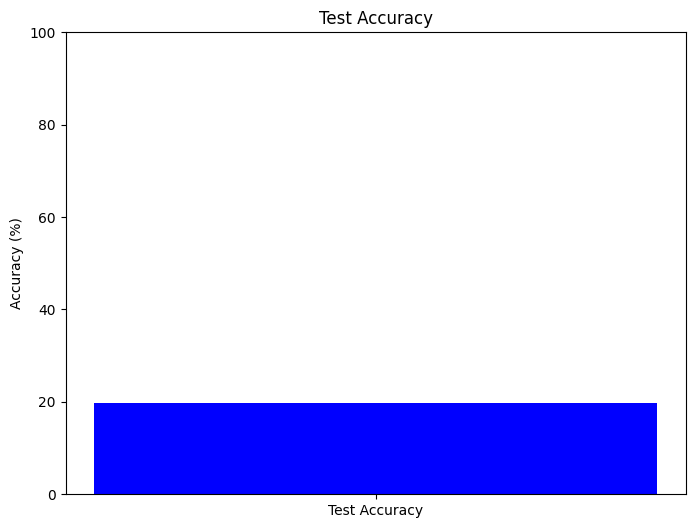

In [42]:
plt.figure(figsize=(8, 6))
plt.bar(["Test Accuracy"], [accuracy * 100], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.ylim(0, 100)
plt.show()


In [43]:
model = EEGAutoencoderClassifier(num_classes).to(device)
dummy_input = torch.randn(1, 64 * 795).to(device)
output = model(dummy_input)
graph = make_dot(output, params=dict(model.named_parameters()))

#Save the graph
#graph.render(filename='model_graph', format='png')
# Display the graph
graph.view()

'Digraph.gv.pdf'

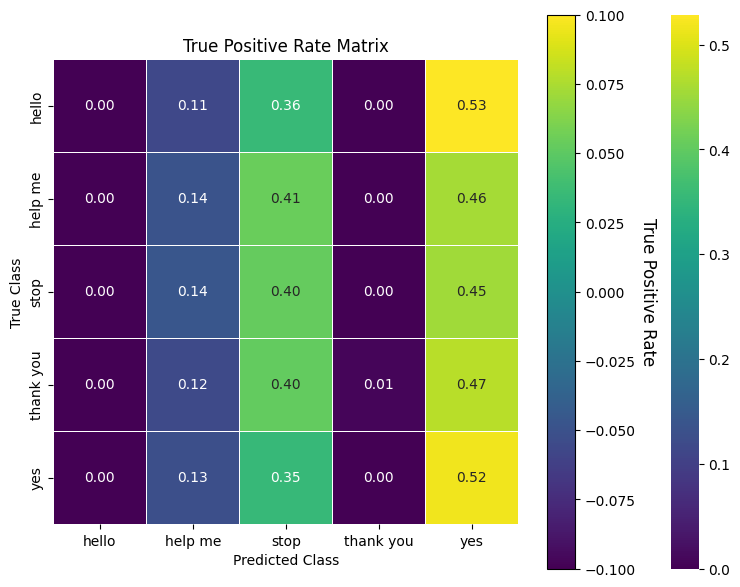

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the data loaders and model as per the provided code

# Define function to compute true positive rate matrix
def compute_true_positive_rate(model, test_loader, num_classes):
    model.eval()
    true_positive_counts = torch.zeros(num_classes, num_classes)
    class_counts = torch.zeros(num_classes)
    
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            for true_label, predicted_label in zip(labels, predicted):
                true_positive_counts[true_label][predicted_label] += 1
                class_counts[true_label] += 1

    true_positive_rate_matrix = true_positive_counts / class_counts[:, None]
    return true_positive_rate_matrix

# Instantiate model and load data as per the provided code

# Train the model
# Code for training the model as per the provided code

# Compute true positive rate matrix
true_positive_rate_matrix = compute_true_positive_rate(model, test_loader, num_classes)

# Class labels
classes = ['hello', 'help me', 'stop', 'thank you', 'yes']

# Plotting true positive rate matrix
plt.figure(figsize=(8, 6))
sns.heatmap(true_positive_rate_matrix.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)

# Create a dummy plot for colorbar
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

plt.tight_layout()
plt.show()


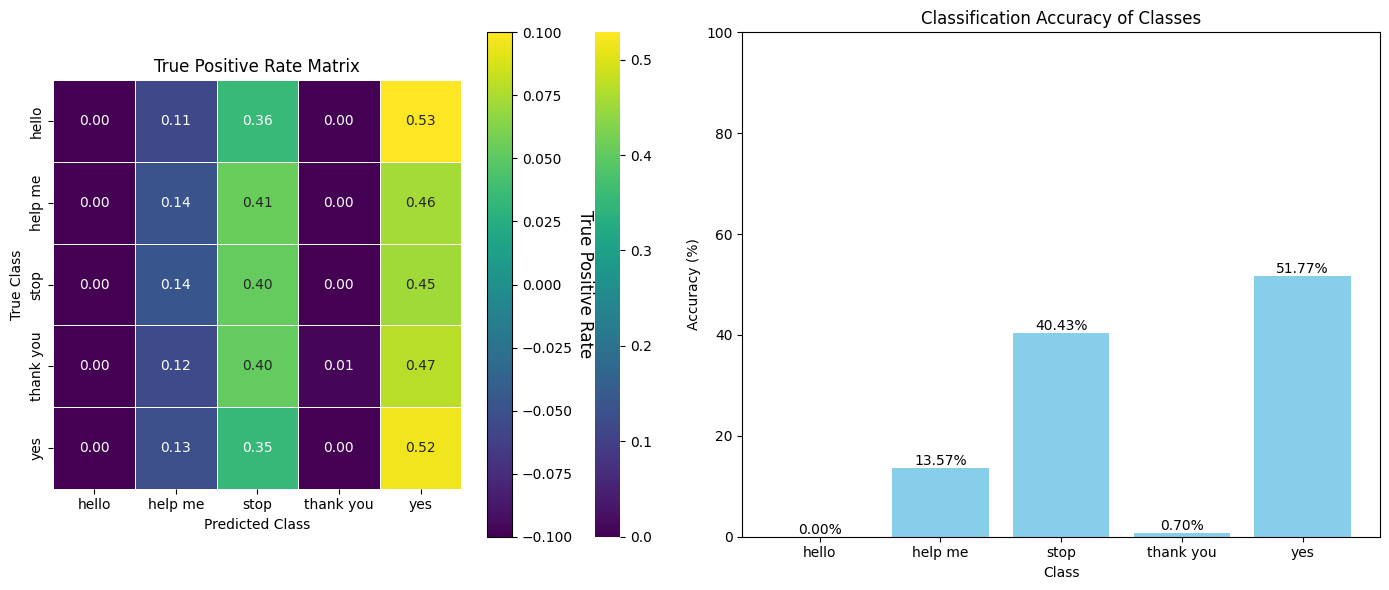

In [45]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the data loaders and model as per the provided code

# Define function to compute true positive rate matrix
def compute_true_positive_rate(model, test_loader, num_classes):
    model.eval()
    true_positive_counts = torch.zeros(num_classes, num_classes)
    class_counts = torch.zeros(num_classes)
    
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            for true_label, predicted_label in zip(labels, predicted):
                true_positive_counts[true_label][predicted_label] += 1
                class_counts[true_label] += 1

    true_positive_rate_matrix = true_positive_counts / class_counts[:, None]
    return true_positive_rate_matrix

# Define function to compute classification accuracy
def compute_accuracy(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for _ in range(num_classes))
    class_total = list(0. for _ in range(num_classes))

    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(num_classes)]
    overall_accuracy = 100 * correct / total
    return overall_accuracy, class_accuracy

# Instantiate model and load data as per the provided code

# Train the model
# Code for training the model as per the provided code

# Compute true positive rate matrix
true_positive_rate_matrix = compute_true_positive_rate(model, test_loader, num_classes)

# Compute classification accuracy
overall_accuracy, class_accuracy = compute_accuracy(model, test_loader)

# Class labels
classes = ['hello', 'help me', 'stop', 'thank you', 'yes']

# Plotting true positive rate matrix
plt.figure(figsize=(14, 6))

# Plotting true positive rate matrix
plt.subplot(1, 2, 1)
sns.heatmap(true_positive_rate_matrix.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)

# Create a dummy plot for colorbar
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

# Plotting classification accuracy
plt.subplot(1, 2, 2)
plt.bar(classes, class_accuracy, color='skyblue')
plt.title('Classification Accuracy of Classes')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for i, acc in enumerate(class_accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Epoch 1/30, Loss: 1.6057103872299194
Epoch 2/30, Loss: 1.619303822517395
Epoch 3/30, Loss: 1.6162861585617065
Epoch 4/30, Loss: 1.6312869787216187
Epoch 5/30, Loss: 1.6052603721618652
Epoch 6/30, Loss: 1.5999341011047363
Epoch 7/30, Loss: 1.6122080087661743
Epoch 8/30, Loss: 1.6226520538330078
Epoch 9/30, Loss: 1.6247661113739014
Epoch 10/30, Loss: 1.614338755607605
Epoch 11/30, Loss: 1.6280320882797241
Epoch 12/30, Loss: 1.6091773509979248
Epoch 13/30, Loss: 1.6012126207351685
Epoch 14/30, Loss: 1.61381995677948
Epoch 15/30, Loss: 1.6035772562026978
Epoch 16/30, Loss: 1.6125987768173218
Epoch 17/30, Loss: 1.6229023933410645
Epoch 18/30, Loss: 1.6046316623687744
Epoch 19/30, Loss: 1.599597454071045
Epoch 20/30, Loss: 1.6195321083068848
Epoch 21/30, Loss: 1.5956908464431763
Epoch 22/30, Loss: 1.6026294231414795
Epoch 23/30, Loss: 1.6220331192016602
Epoch 24/30, Loss: 1.6129413843154907
Epoch 25/30, Loss: 1.6190921068191528
Epoch 26/30, Loss: 1.6118102073669434
Epoch 27/30, Loss: 1.62644

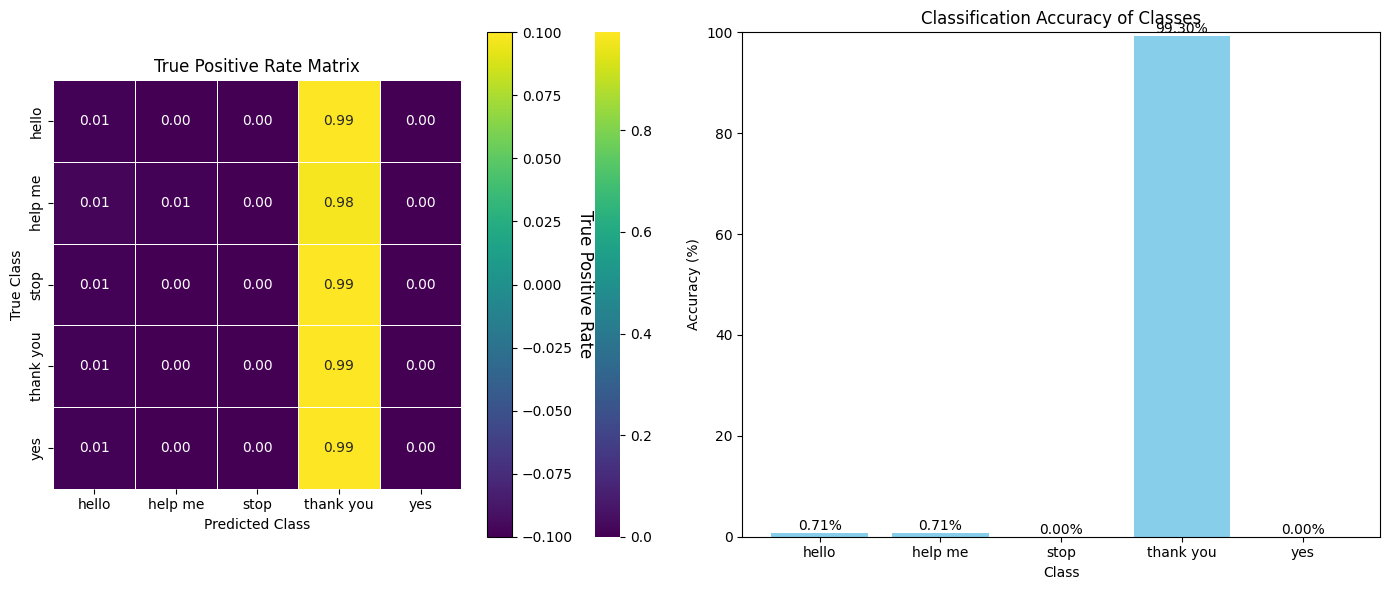

In [46]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined the data loaders and model as per the provided code

# Define function to create the model
def create_model(num_classes):
    model = EEGAutoencoderClassifier(num_classes).to(device) 
    return model

# Define function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader: 
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Define function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for _ in range(num_classes))
    class_total = list(0. for _ in range(num_classes))

    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    overall_accuracy = 100 * correct / total
    return overall_accuracy, class_accuracy

# Instantiate model and load data as per the provided code

# Train the model
model = create_model(num_classes)
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs)

# Compute true positive rate matrix
true_positive_rate_matrix = compute_true_positive_rate(model, test_loader, num_classes)

# Compute classification accuracy
overall_accuracy, class_accuracy = evaluate_model(model, test_loader)

# Class labels
classes = ['hello', 'help me', 'stop', 'thank you', 'yes']

# Plotting true positive rate matrix
plt.figure(figsize=(14, 6))

# Plotting true positive rate matrix
plt.subplot(1, 2, 1)
sns.heatmap(true_positive_rate_matrix.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)

# Create a dummy plot for colorbar
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

# Plotting classification accuracy
plt.subplot(1, 2, 2)
plt.bar(classes, class_accuracy, color='skyblue')
plt.title('Classification Accuracy of Classes')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for i, acc in enumerate(class_accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Epoch 1/30, Loss: 1.6100330352783203
Epoch 2/30, Loss: 1.606072187423706
Epoch 3/30, Loss: 1.6137726306915283
Epoch 4/30, Loss: 1.6167924404144287
Epoch 5/30, Loss: 1.6131864786148071
Epoch 6/30, Loss: 1.6165605783462524
Epoch 7/30, Loss: 1.6012017726898193
Epoch 8/30, Loss: 1.6159965991973877
Epoch 9/30, Loss: 1.6050187349319458
Epoch 10/30, Loss: 1.6093580722808838
Epoch 11/30, Loss: 1.6072776317596436
Epoch 12/30, Loss: 1.6133389472961426
Epoch 13/30, Loss: 1.6178585290908813
Epoch 14/30, Loss: 1.6114791631698608
Epoch 15/30, Loss: 1.6114460229873657
Epoch 16/30, Loss: 1.6009974479675293
Epoch 17/30, Loss: 1.6072543859481812
Epoch 18/30, Loss: 1.6095755100250244
Epoch 19/30, Loss: 1.6045377254486084
Epoch 20/30, Loss: 1.601400375366211
Epoch 21/30, Loss: 1.6057924032211304
Epoch 22/30, Loss: 1.6213995218276978
Epoch 23/30, Loss: 1.6100425720214844
Epoch 24/30, Loss: 1.602192997932434
Epoch 25/30, Loss: 1.6157939434051514
Epoch 26/30, Loss: 1.6156779527664185
Epoch 27/30, Loss: 1.602

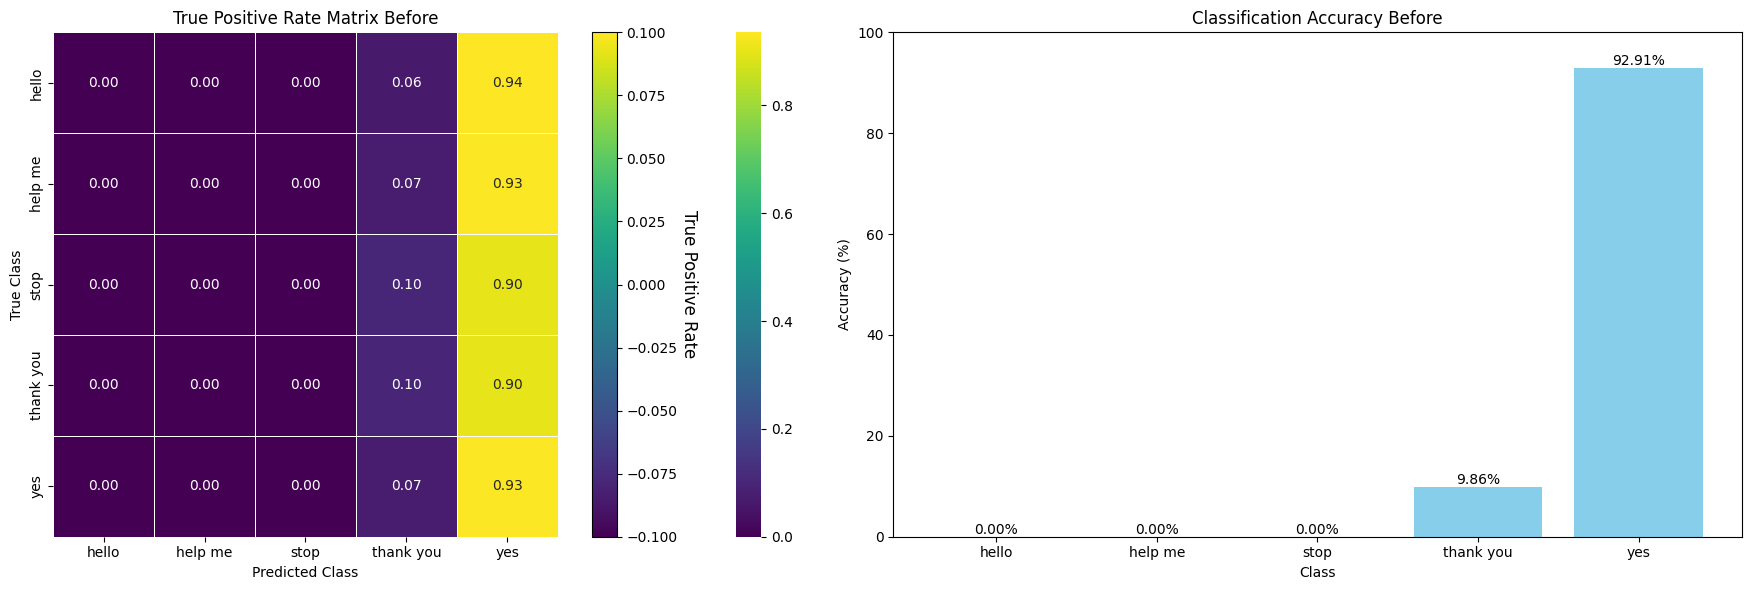

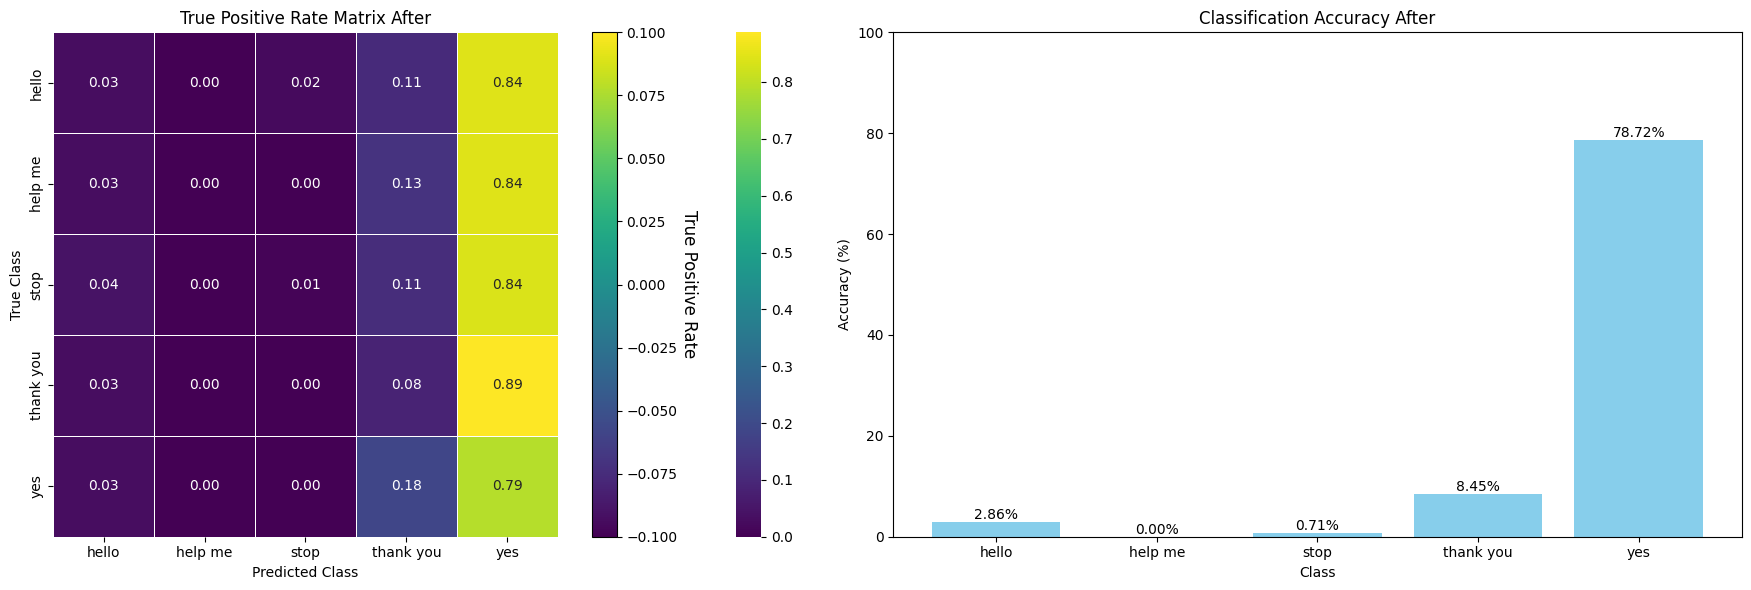

In [47]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to create the model
def create_model(num_classes):
    model = EEGAutoencoderClassifier(num_classes).to(device) 
    return model

# Define function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader: 
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Define function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for _ in range(num_classes))
    class_total = list(0. for _ in range(num_classes))

    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    class_accuracy = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    overall_accuracy = 100 * correct / total
    return overall_accuracy, class_accuracy

# Define function to compute true positive rate matrix
def compute_true_positive_rate(model, test_loader, num_classes):
    model.eval()
    true_positive_counts = torch.zeros(num_classes, num_classes)
    class_counts = torch.zeros(num_classes)
    
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            for true_label, predicted_label in zip(labels, predicted):
                true_positive_counts[true_label][predicted_label] += 1
                class_counts[true_label] += 1

    true_positive_rate_matrix = true_positive_counts / class_counts[:, None]
    return true_positive_rate_matrix

# Instantiate model and load data as per the provided code

# Train the model
model_before = create_model(num_classes)
true_positive_rate_matrix_before = compute_true_positive_rate(model_before, test_loader, num_classes)
overall_accuracy_before, class_accuracy_before = evaluate_model(model_before, test_loader)

model_after = create_model(num_classes)
train_model(model_after, train_loader, test_loader, criterion, optimizer, num_epochs)
true_positive_rate_matrix_after = compute_true_positive_rate(model_after, test_loader, num_classes)
overall_accuracy_after, class_accuracy_after = evaluate_model(model_after, test_loader)

# Class labels
classes = ['hello', 'help me', 'stop', 'thank you', 'yes']

# Plotting comparison
plt.figure(figsize=(18, 6))

# Plotting true positive rate matrix before
plt.subplot(1, 2, 1)
sns.heatmap(true_positive_rate_matrix_before.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix Before')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

# Plotting classification accuracy before
plt.subplot(1, 2, 2)
plt.bar(classes, class_accuracy_before, color='skyblue')
plt.title('Classification Accuracy Before')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(class_accuracy_before):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

# Plotting true positive rate matrix after
plt.subplot(1, 2, 1)
sns.heatmap(true_positive_rate_matrix_after.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix After')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

# Plotting classification accuracy after
plt.subplot(1, 2, 2)
plt.bar(classes, class_accuracy_after, color='skyblue')
plt.title('Classification Accuracy After')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(class_accuracy_after):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [3]:
class EEGAutoencoderClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EEGAutoencoderClassifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(64 * 795, 256), # Input dimension is 64 channels * 795 time points, and use 256 units for first NN layer
            nn.ReLU(), # Use ReLu function for NN training 
            nn.Linear(256, 128), # 256 NN units to 128 units
            nn.ReLU(),
            nn.Linear(128, 64),#  128 NN units to 64 units
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Linear(64, num_classes), # num_classes is 5 (hello, help me, stop, thank you, and yes)
            nn.LogSoftmax(dim=1)  # Use LogSoftmax for multi-class classification
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.classifier(x)
        return x

num_classes = 5 # setting final output class
model = EEGAutoencoderClassifier(num_classes).to(device) 
criterion = nn.NLLLoss() # Use NLLLoss function to optimize
optimizer = optim.Adam(model.parameters(), lr=0.001) # Setting parameters learning rate = 0.001

num_epochs = 20 # setting training epochs (Number of training iterations)
for epoch in range(num_epochs):
    model.train()
    for data, labels in train_loader: 
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Define function to compute true positive rate matrix
def compute_true_positive_rate(model, test_loader, num_classes):
    model.eval()
    true_positive_counts = torch.zeros(num_classes, num_classes)
    class_counts = torch.zeros(num_classes)
    
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            for true_label, predicted_label in zip(labels, predicted):
                true_positive_counts[true_label][predicted_label] += 1
                class_counts[true_label] += 1

    true_positive_rate_matrix = true_positive_counts / class_counts[:, None]
    return true_positive_rate_matrix

# Compute true positive rate matrix
true_positive_rate_matrix = compute_true_positive_rate(model, test_loader, num_classes)

# Class labels
classes = ['hello', 'help me', 'stop', 'thank you', 'yes']

# Plotting true positive rate matrix
plt.figure(figsize=(8, 6))
sns.heatmap(true_positive_rate_matrix.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)

# Create a dummy plot for colorbar
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

plt.tight_layout()
plt.show()

# Define function to compute classification accuracy
def compute_accuracy(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for _ in range(num_classes))
    class_total = list(0. for _ in range(num_classes))

    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(num_classes)]
    overall_accuracy = 100 * correct / total
    return overall_accuracy, class_accuracy

# Compute classification accuracy
overall_accuracy, class_accuracy = compute_accuracy(model, test_loader)

# Plotting true positive rate matrix
plt.figure(figsize=(14, 6))

# Plotting true positive rate matrix
plt.subplot(1, 2, 1)
sns.heatmap(true_positive_rate_matrix.numpy(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('True Positive Rate Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(ticks=np.arange(5) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(5) + 0.5, labels=classes)

# Create a dummy plot for colorbar
dummy = plt.imshow([[0,0],[0,0]], cmap='viridis')
plt.colorbar(dummy).set_label('True Positive Rate', rotation=270, labelpad=15, fontsize=12)

# Plotting classification accuracy
plt.subplot(1, 2, 2)
plt.bar(classes, class_accuracy, color='skyblue')
plt.title('Classification Accuracy of Classes')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for i, acc in enumerate(class_accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

NameError: name 'nn' is not defined